<a href="https://colab.research.google.com/github/harrislam1/2025MLZOOMCAMP/blob/main/2025_ML_ZOOMCAMP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [90]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

## Preparing the dataset
Use only the following columns:


*   'engine_displacement'
*   'horsepower'
*   'vehicle_weight'
*   'model_year'
*   'fuel_efficiency_mpg'





In [91]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [92]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [93]:
df_extract=df[['engine_displacement','horsepower', 'vehicle_weight', 'model_year','fuel_efficiency_mpg']]

## Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: >

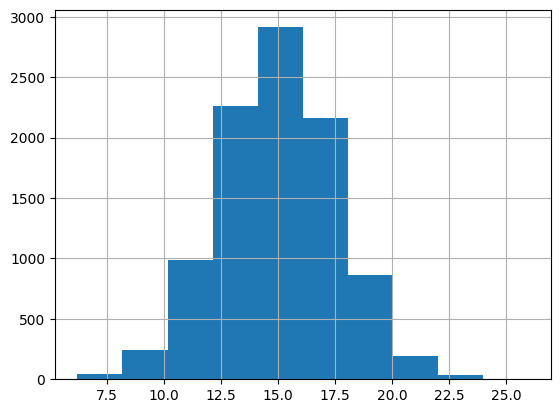

In [94]:
df_extract['fuel_efficiency_mpg'].hist()

<Axes: >

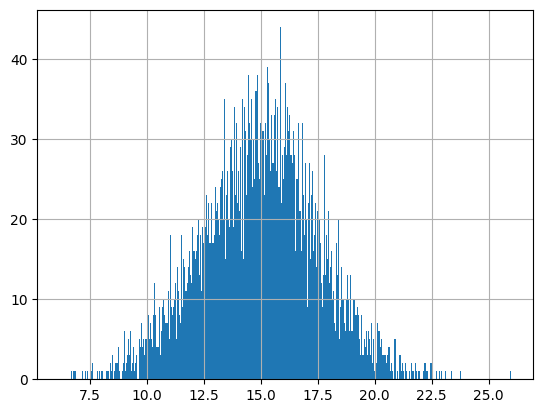

In [95]:
df_extract['fuel_efficiency_mpg'].hist(bins=1000)

## There's one column with missing values. What is it?

In [96]:
df_extract.isna().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


## What's the median (50% percentile) for variable 'horsepower'?

In [97]:
df_extract['horsepower'].median()

149.0

## Which option gives better RMSE?

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options.

For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [98]:
n=len(df_extract)
n_val= int(n*0.2)
n_test= int(n*0.2)
n_train=n-n_val-n_test

print(n,n_val+n_test+n_train)

idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train=df_extract.iloc[idx[:n_train]]
df_val=df_extract.iloc[idx[n_train:n_train+n_val]]
df_test=df_extract.iloc[idx[n_train+n_val:]]

9704 9704


In [99]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [100]:
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()

df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

#filling with zero
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)
df_test_zero['horsepower'] = df_test_zero['horsepower'].fillna(0)

#filling with mean
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(df_train['horsepower'].mean())
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(df_val['horsepower'].mean())
df_test_mean['horsepower'] = df_test_mean['horsepower'].fillna(df_test['horsepower'].mean())



In [101]:
y_train_orig_zero = df_train_zero.fuel_efficiency_mpg.values
y_val_orig_zero = df_val_zero.fuel_efficiency_mpg.values
y_test_orig_zero = df_test_zero.fuel_efficiency_mpg.values

In [102]:
y_train_orig_mean = df_train_mean.fuel_efficiency_mpg.values
y_val_orig_mean = df_val_mean.fuel_efficiency_mpg.values
y_test_orig_mean = df_test_mean.fuel_efficiency_mpg.values

In [103]:
del df_train_zero['fuel_efficiency_mpg']
del df_val_zero['fuel_efficiency_mpg']
del df_test_zero['fuel_efficiency_mpg']

X_train_orig_zero = df_train_zero
X_val_orig_zero = df_val_zero
X_test_orig_zero = df_test_zero

In [104]:
del df_train_mean['fuel_efficiency_mpg']
del df_val_mean['fuel_efficiency_mpg']
del df_test_mean['fuel_efficiency_mpg']

X_train_orig_mean = df_train_mean
X_val_orig_mean = df_val_mean
X_test_orig_mean = df_test_mean

In [105]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [106]:
w_0_zero, w_zero = train_linear_regression(X_train_orig_zero, y_train_orig_zero)

In [107]:
y_pred_zero = w_0_zero + df_train_zero.dot(w_zero)

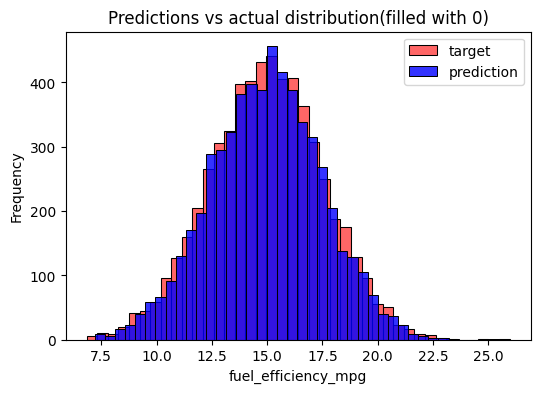

In [108]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train_orig_zero, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_zero, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution(filled with 0)')

plt.show()

In [109]:
def rmse(y, y_pred_zero):
    error = y_pred_zero - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [110]:
print(rmse(y_train_orig_zero, y_pred_zero))

0.5202614265099076


In [111]:
y_pred_zero2 = w_0_zero +X_val_orig_zero.dot(w_zero)

In [112]:
print(rmse(y_val_orig_zero, y_pred_zero2))

0.5173782638844466


In [113]:
w_0_mean, w_mean = train_linear_regression(X_train_orig_mean, y_train_orig_mean)
y_pred_mean = w_0_mean + df_train_mean.dot(w_mean)

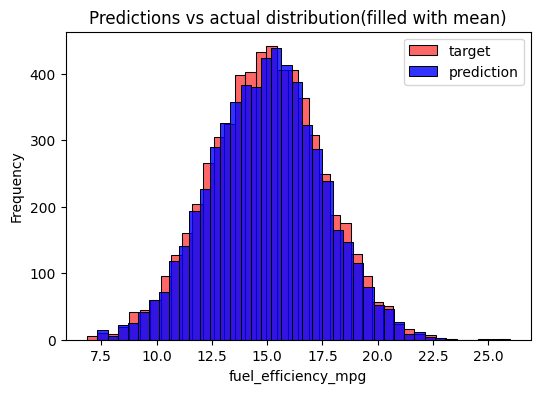

In [114]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train_orig_mean, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution(filled with mean)')

plt.show()

In [115]:
print(rmse(y_train_orig_mean, y_pred_mean))

0.4624412137959964


In [116]:
y_pred_mean2 = w_0_mean +X_val_orig_mean.dot(w_mean)
print(rmse(y_val_orig_mean, y_pred_mean2))

0.4636236995020941


In [117]:
df_extract[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']]

,engine_displacement,horsepower,vehicle_weight,model_year
0,170,159.0,3413.433759,2003
1,130,97.0,3149.664934,2007
2,170,78.0,3079.038997,2018
3,220,NaN,2542.392402,2009
4,210,140.0,3460.870990,2009
...,...,...,...,...
9699,140,164.0,2981.107371,2013
9700,180,154.0,2439.525729,2004
9701,220,138.0,2583.471318,2008
9702,230,177.0,2905.527390,2011


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# 1. data

X = df_extract[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']]  # Feature
y =df_extract[['fuel_efficiency_mpg']] # Target

X=X.fillna(0)
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate RMSE
rmse_val = root_mean_squared_error(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")

Coefficients: [[ 7.91607285e-05  3.70843002e-03 -5.00945406e-03  1.38929657e-03]]
Intercept: [26.69660555]
Root Mean Squared Error (RMSE): 0.5302460163624645


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# 1. data
X = df_extract[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']]  # Feature
y =df_extract[['fuel_efficiency_mpg']] # Target

X=X.fillna(X['horsepower'].mean())
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate RMSE
rmse_val = root_mean_squared_error(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")

Coefficients: [[ 0.00019192  0.01013536 -0.00500916  0.00058365]]
Intercept: [27.29171995]
Root Mean Squared Error (RMSE): 0.47043949653450046


##Now let's train a regularized linear regression.
For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?


In [120]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [121]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_orig_zero, y_train_orig_zero, r=r)
    y_pred_zero = w_0 + X_val_orig_zero.dot(w)
    print('%.4f, %.6f' % (r ,rmse(y_val_orig_zero, y_pred_zero)))


0.0000, 0.517378
0.0100, 0.517112
0.1000, 0.518753
1.0000, 0.522235
5.0000, 0.522892
10.0000, 0.522981
100.0000, 0.523064


##We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [122]:
n=len(df_extract)
n_val= int(n*0.2)
n_test= int(n*0.2)
n_train=n-n_val-n_test

print(n,n_val+n_test+n_train)

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values = []
for seed in seed_values:
  np.random.seed(seed)
  idx=np.arange(n)
  np.random.shuffle(idx)
  df_train=df_extract.iloc[idx[:n_train]]
  df_val=df_extract.iloc[idx[n_train:n_train+n_val]]
  df_test=df_extract.iloc[idx[n_train+n_val:]]
  X_train = df_train[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
  X_val = df_val[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
  X_test = df_test[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
  y_train = df_train[['fuel_efficiency_mpg']]
  y_val = df_val[['fuel_efficiency_mpg']]
  y_test = df_test[['fuel_efficiency_mpg']]
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_val.dot(w)
  rmse_val = rmse(y_val.values, y_pred.values)
  rmse_values.append(rmse_val)
  print(f"Seed: {seed}")
  print(f"Root Mean Squared Error (RMSE): {rmse_val}")

9704 9704
Seed: 0
Root Mean Squared Error (RMSE): 0.5206531296294218
Seed: 1
Root Mean Squared Error (RMSE): 0.521338891285577
Seed: 2
Root Mean Squared Error (RMSE): 0.5228069974803171
Seed: 3
Root Mean Squared Error (RMSE): 0.515951674119676
Seed: 4
Root Mean Squared Error (RMSE): 0.5109129460053851
Seed: 5
Root Mean Squared Error (RMSE): 0.52834064601107
Seed: 6
Root Mean Squared Error (RMSE): 0.5313910658146311
Seed: 7
Root Mean Squared Error (RMSE): 0.5090670387381733
Seed: 8
Root Mean Squared Error (RMSE): 0.5147399129511132
Seed: 9
Root Mean Squared Error (RMSE): 0.5131865908224594


In [123]:
np.std(rmse_values)

np.float64(0.006989446426433706)

##Split the dataset like previously, use seed 9.
Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [124]:
n=len(df_extract)
#n_val= int(n*0.2)
n_test= int(n*0.2)
n_train=n-n_test

#print(n,n_val+n_test+n_train)

seed_value = 9
#rmse_values = []
#for seed in seed_values:
np.random.seed(seed_value)
idx=np.arange(n)
np.random.shuffle(idx)
df_train=df_extract.iloc[idx[:n_train]]
#df_val=df_extract.iloc[idx[n_train:n_train+n_val]]
df_test=df_extract.iloc[idx[n_train:]]
X_train = df_train[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
#X_val = df_val[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
X_test = df_test[['engine_displacement','horsepower', 'vehicle_weight', 'model_year']].fillna(0)
y_train = df_train[['fuel_efficiency_mpg']]
#y_val = df_val[['fuel_efficiency_mpg']]
y_test = df_test[['fuel_efficiency_mpg']]
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_test.dot(w)
rmse_val = rmse(y_test.values, y_pred.values)
rmse_values.append(rmse_val)
#print(f"Seed: {seed}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")

Root Mean Squared Error (RMSE): 0.5156132022024005
